In [13]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


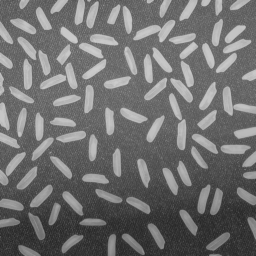

In [14]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/rice.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

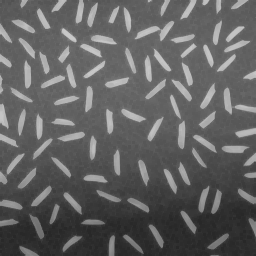

In [15]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(gImg, kernel, iterations=1)
cv2_imshow(erosion)

노이즈 삭제하고 erode하고 dilate해야함

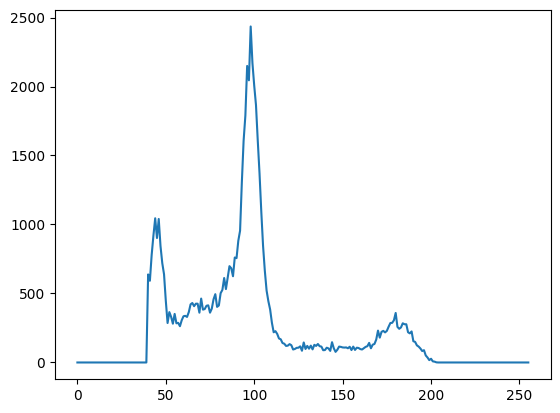

In [16]:
hist = cv2.calcHist([erosion], [0], None, [256], [0, 256])
plt.plot(hist)

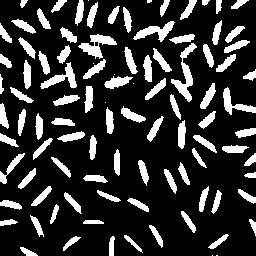

In [17]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.uint8)

threshold = 110

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if erosion[i, j] > threshold:
      gBin[i, j] = 255

cv2_imshow(gBin)

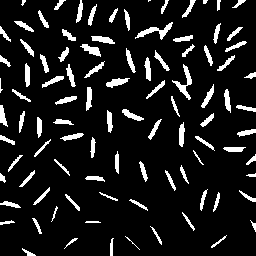

In [18]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(gBin, kernel, iterations=1)
cv2_imshow(erosion)

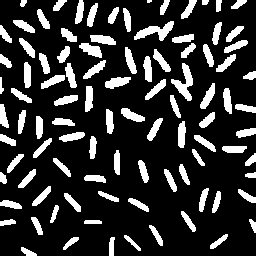

In [19]:
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(erosion, kernel, iterations=1)
cv2_imshow(dilate)

In [20]:
num_labels, labels = cv2.connectedComponents(dilate, connectivity=8)
print(num_labels)

98


(480, 1622, 3)


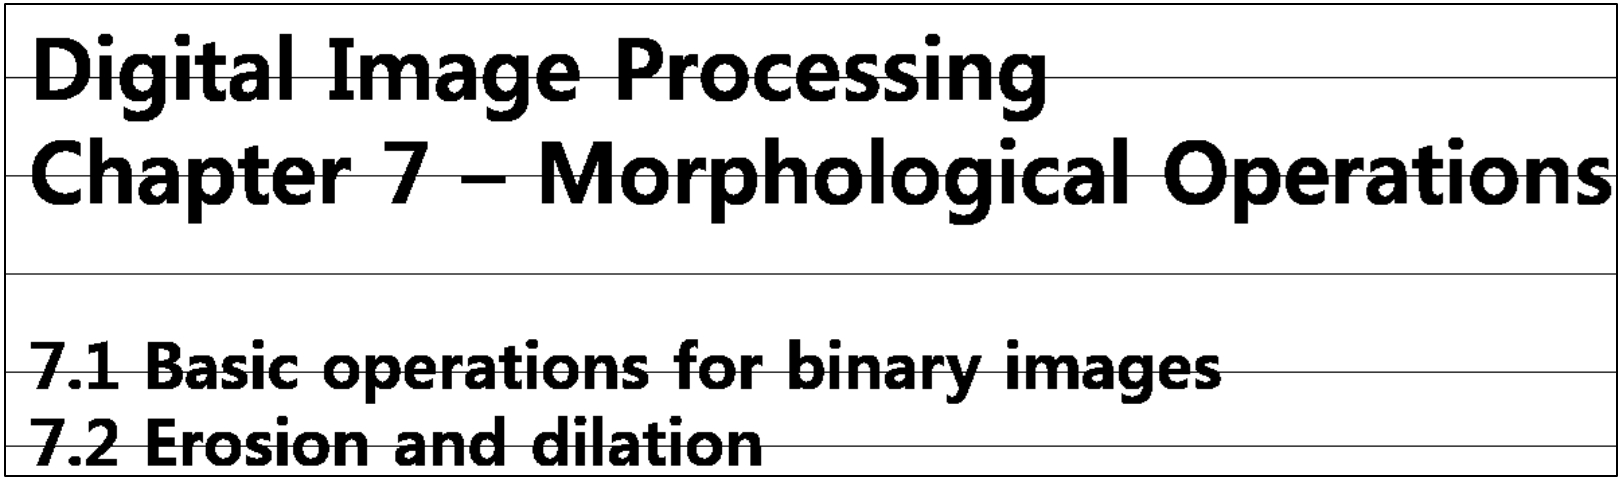

In [21]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/scanimg.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

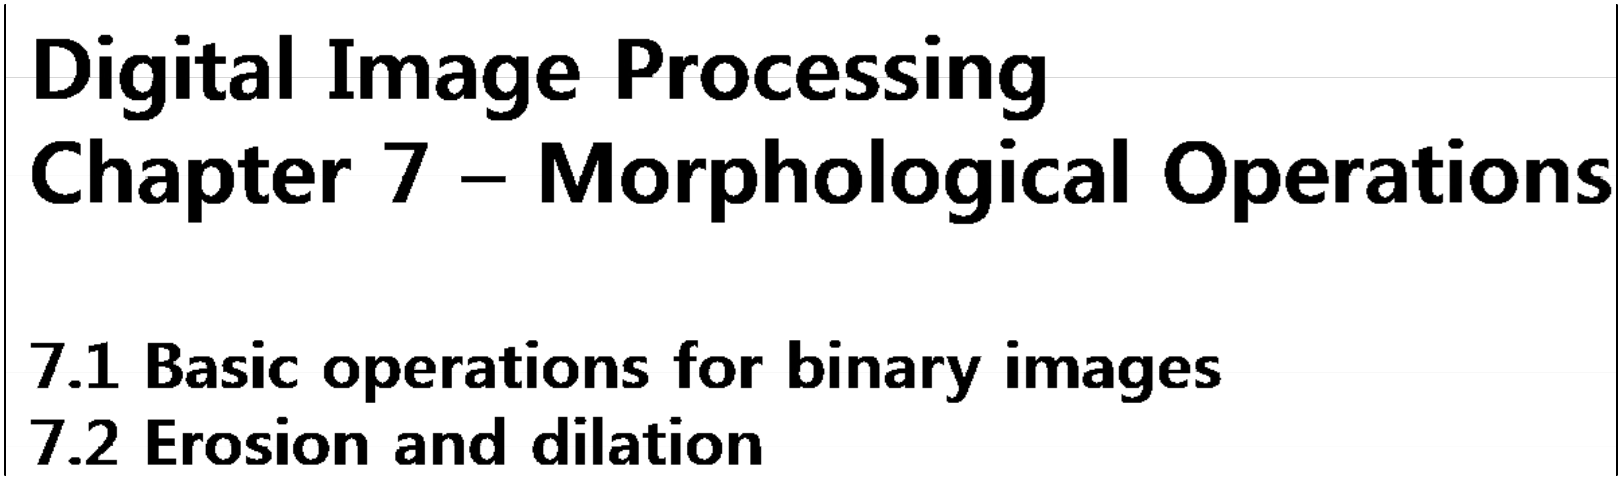

In [29]:
kernel = np.ones((3,1), np.uint8)
dilate = cv2.dilate(gImg, kernel, iterations=1)
cv2_imshow(dilate)

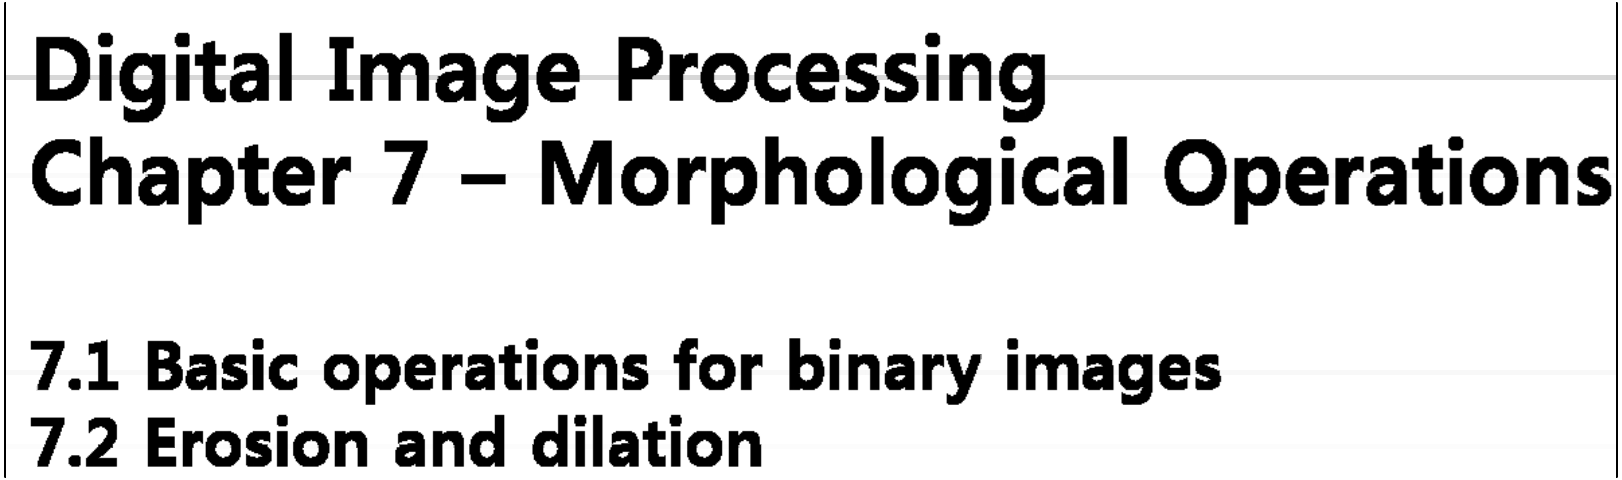

In [30]:
kernel = np.ones((3,1), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations=2)
cv2_imshow(erosion)

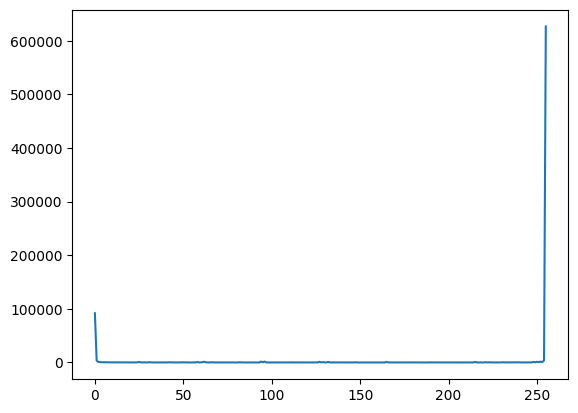

In [31]:
hist = cv2.calcHist([gImg], [0], None, [256], [0, 256])
plt.plot(hist)

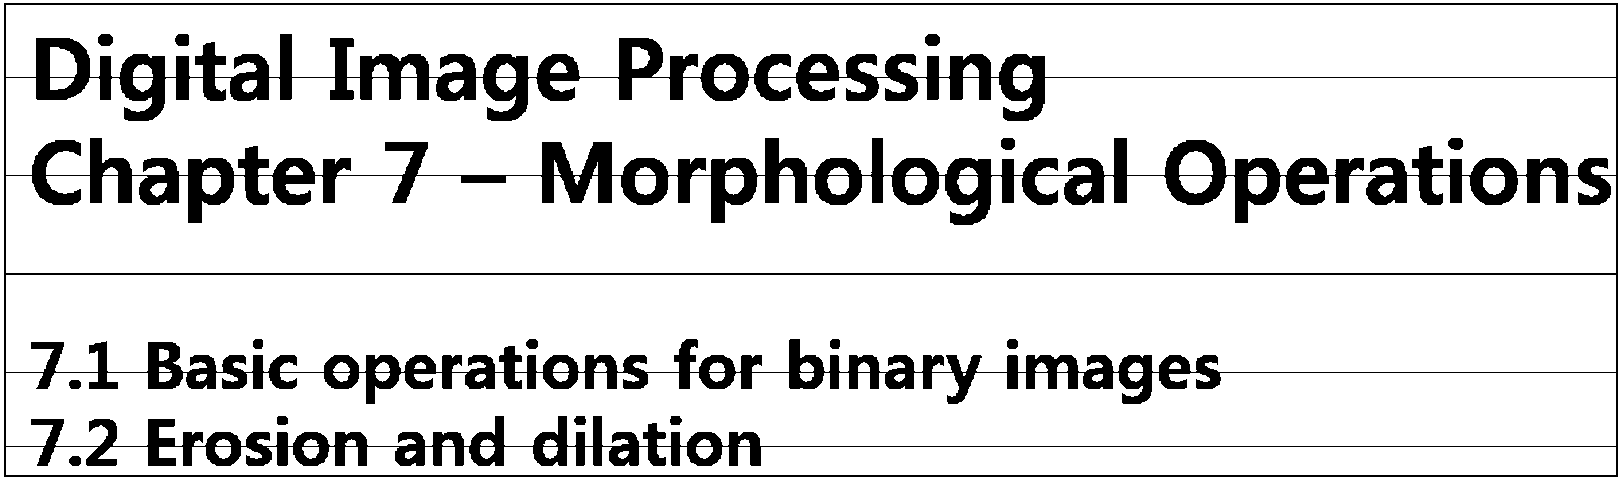

In [33]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype=np.uint8)

threshold = 110

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if gImg[i, j] > threshold:
      gBin[i, j] = 255

cv2_imshow(gBin)

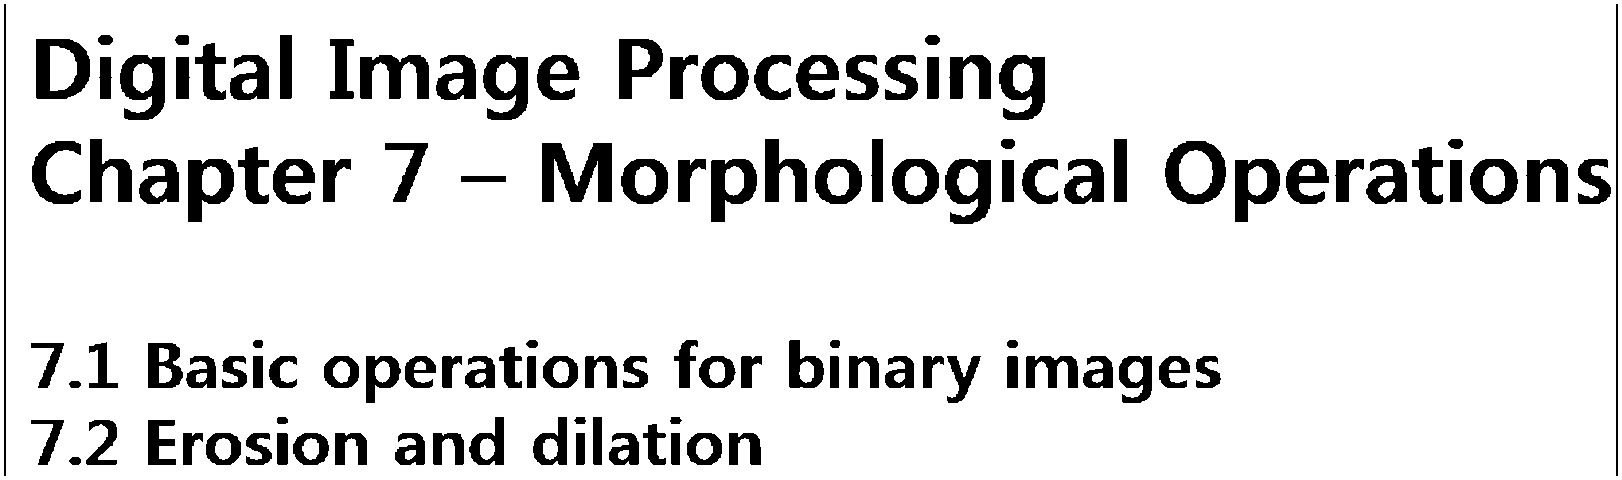

In [35]:
kernel = np.ones((3,1), np.uint8)
dilate = cv2.dilate(gBin, kernel, iterations=1)
cv2_imshow(dilate)

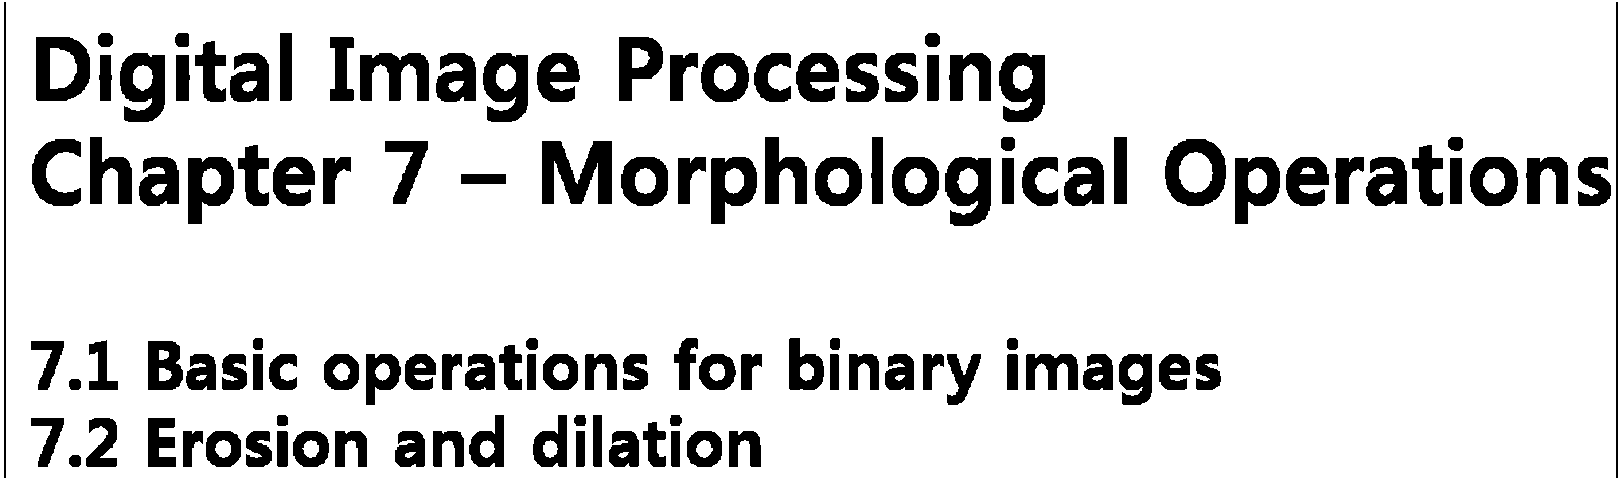

In [36]:
kernel = np.ones((3,1), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations=2)
cv2_imshow(erosion)